<a href="https://colab.research.google.com/github/Naveen-R-M/OCR/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install pytesseract

In [63]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [64]:
from google.colab import files
from google.colab.patches import cv2_imshow

In [65]:
import pytesseract
import cv2

from PIL import Image

In [66]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

Saving hqdefault.jpg to hqdefault (2).jpg


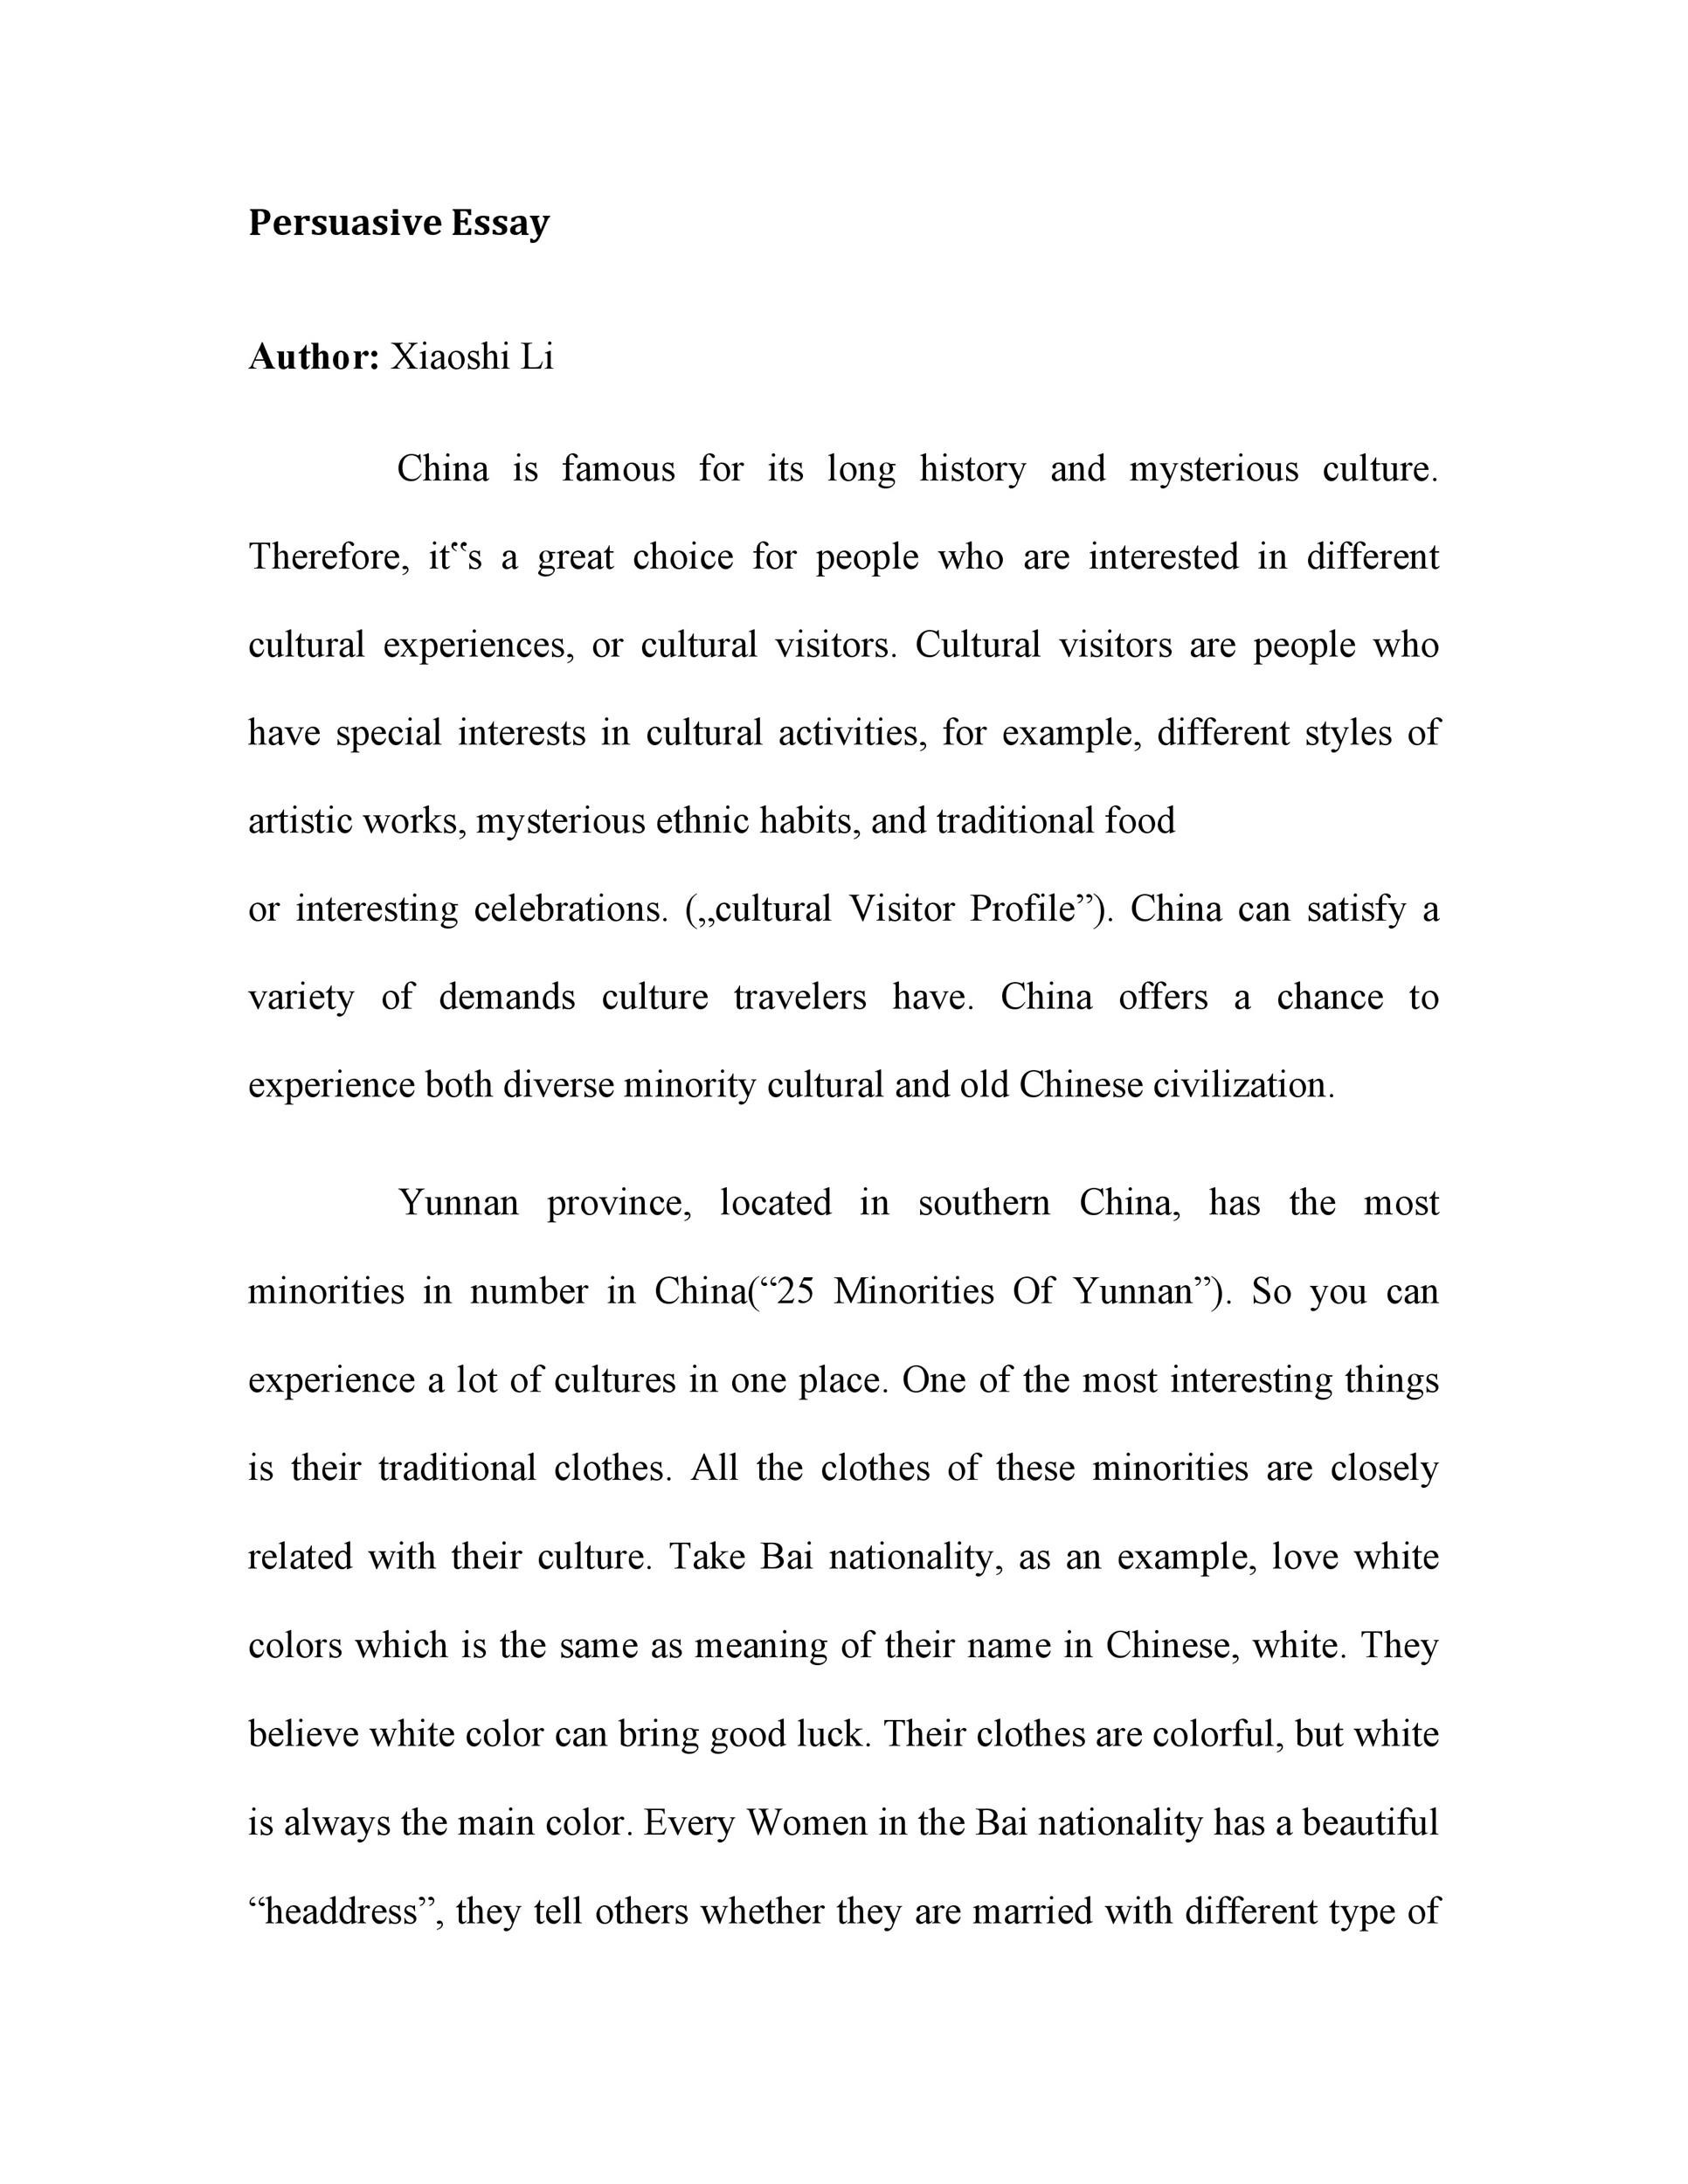

In [143]:
img = files.upload()
path = [key for key,item in img.items()][0]
path
img = Image.open(path)
img

In [144]:
result = pytesseract.image_to_string(img)
result

'Persuasive Essay\n\nAuthor: Xiaoshi Li\n\nChina is famous for its long history and mysterious culture.\nTherefore, it“s a great choice for people who are interested in different\ncultural experiences, or cultural visitors. Cultural visitors are people who\nhave special interests in cultural activities, for example, different styles of\nartistic works, mysterious ethnic habits, and traditional food\nor interesting celebrations. (,,cultural Visitor Profile”). China can satisfy a\nvariety of demands culture travelers have. China offers a chance to\n\nexperience both diverse minority cultural and old Chinese civilization.\n\nYunnan province, located in southern China, has the most\nminorities in number in China(“25 Minorities Of Yunnan”). So you can\nexperience a lot of cultures in one place. One of the most interesting things\nis their traditional clothes. All the clothes of these minorities are closely\nrelated with their culture. Take Bai nationality, as an example, love white\ncolors 

In [145]:
img = cv2.imread(path)
height, width, depth = img.shape
height, width

(2500, 1932)

In [146]:
def image_to_boxes(img):
    img = cv2.imread(img)
    boxes = pytesseract.image_to_boxes(img)
    for x,lines in enumerate(boxes.splitlines()):

        dimensions = lines.split(' ')
        x,y,w,h = int(dimensions[1]), int(dimensions[2]), int(dimensions[3]), int(dimensions[4])
        cv2.rectangle(img, (x,height - y), (w,height - h), (0,0,255), 2)
        cv2.putText(img, dimensions[0], (x, height - y + 25), cv2.FONT_HERSHEY_COMPLEX, 1 ,(50,50,255), 2 )

    cv2_imshow(img)

In [147]:
def image_to_data(img):
    img = cv2.imread(img)
    boxes = pytesseract.image_to_data(img)
    for x,lines in enumerate(boxes.splitlines()):
        if x != 0:
            dimensions = lines.split()
            if len(dimensions) == 12:
                x,y,w,h = int(dimensions[6]), int(dimensions[7]), int(dimensions[8]), int(dimensions[9])
                cv2.rectangle(img, (x,y), (w + x, h + y), (0,0,255), 2)
                cv2.putText(img, dimensions[11], (x, y), cv2.FONT_HERSHEY_COMPLEX, 1 ,(50,50,255), 2 )

    cv2_imshow(img)

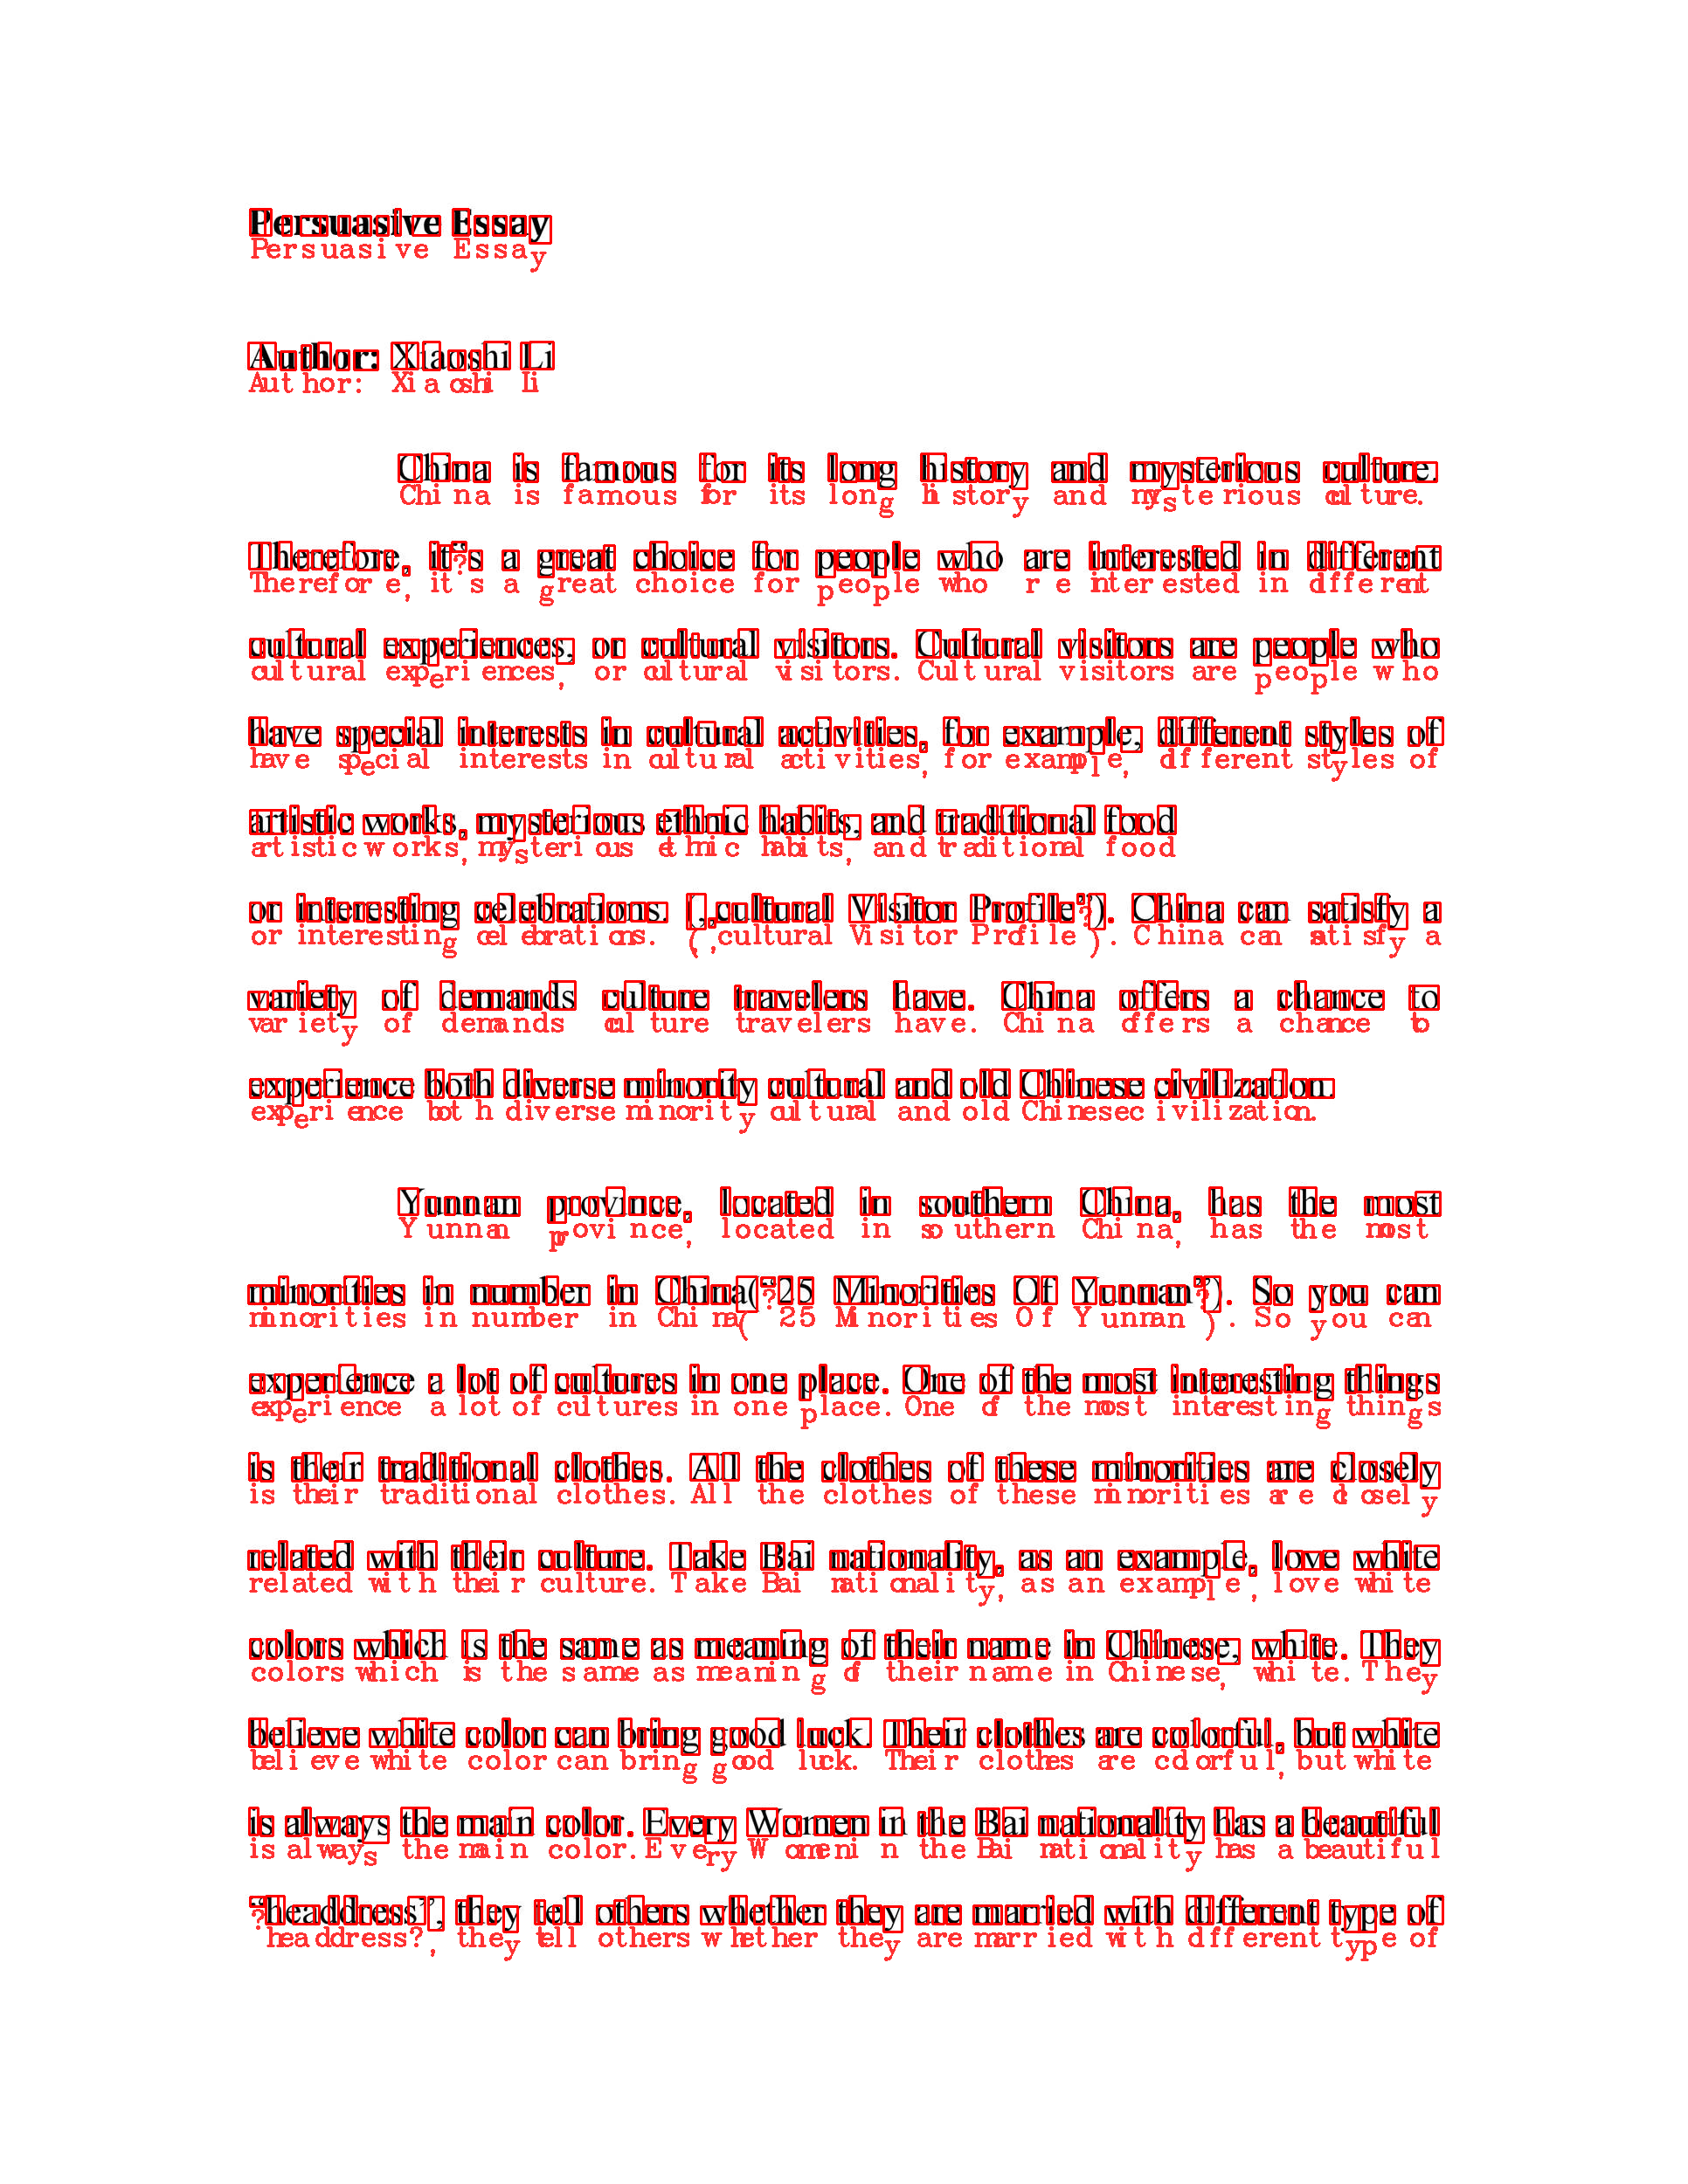

In [148]:
image_to_boxes(path)

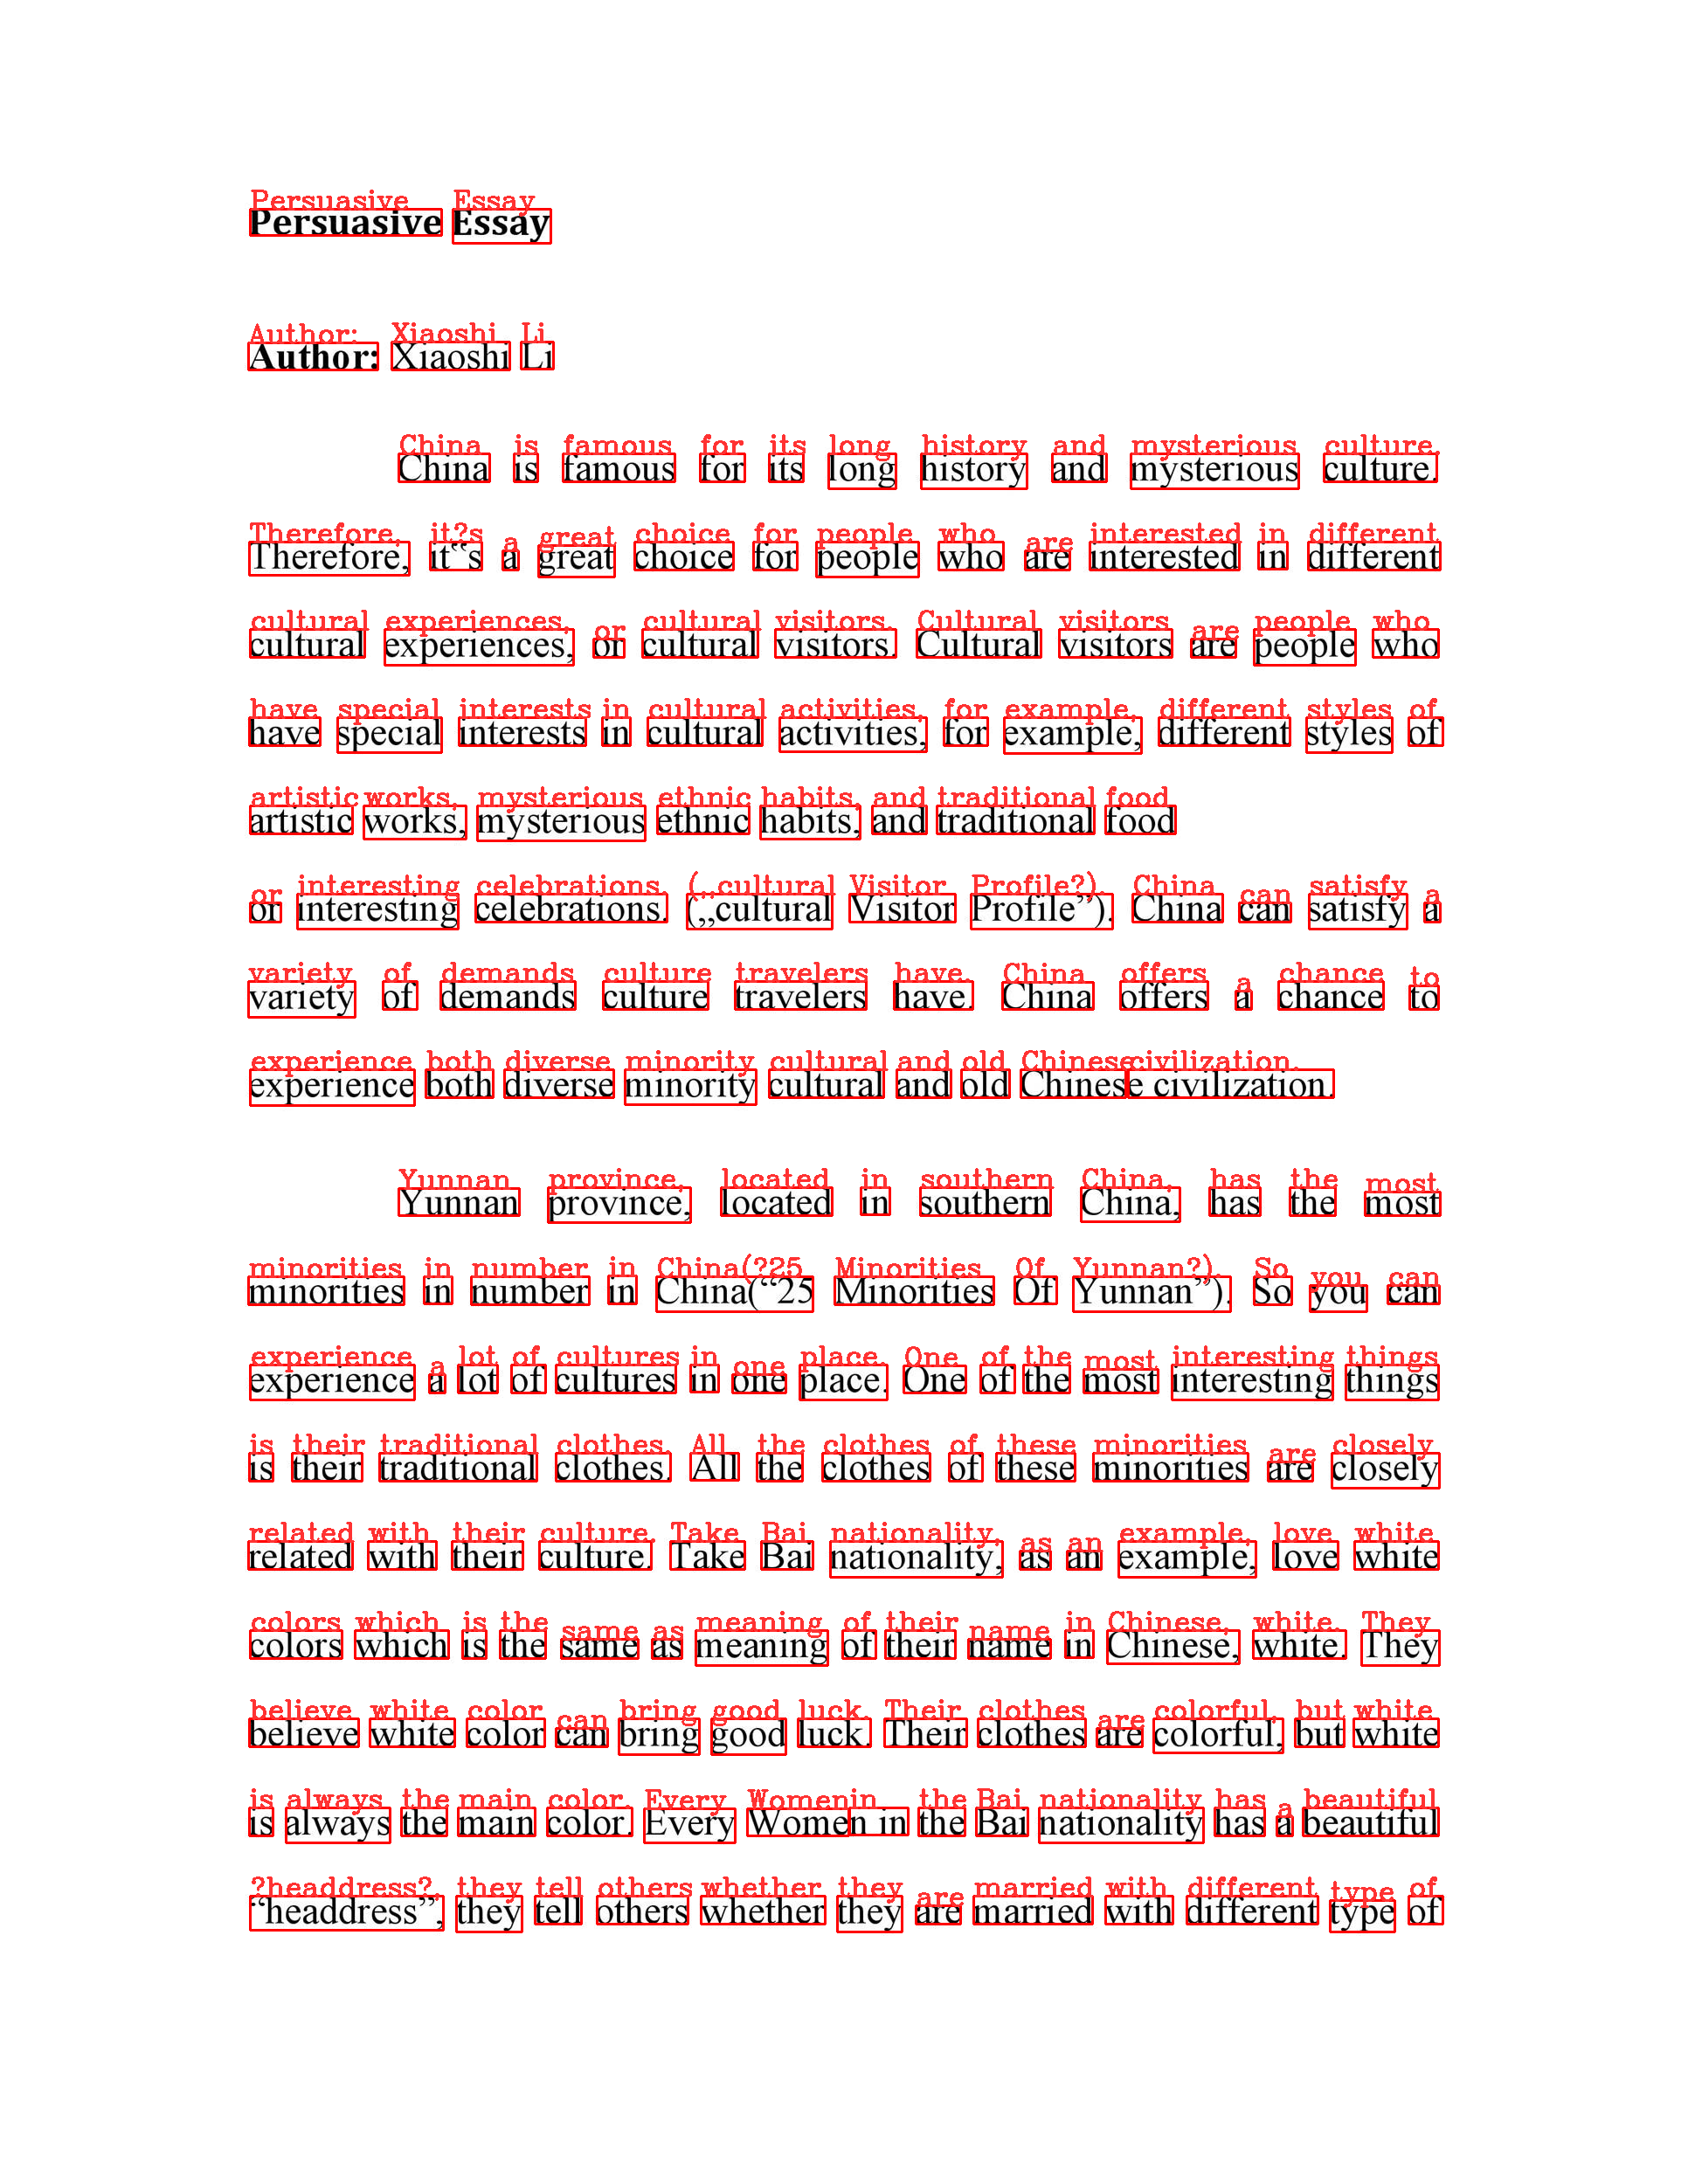

In [149]:
image_to_data(path)